In [1]:
#!pip install imblearn 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
#To load dataset 
df=pd.read_csv("telecom_churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Churn :  - customer churn also known as customer defection  , is the loss
#of customers .

In [6]:
pd.set_option('display.max_columns',None)#to show all columns

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#target variable : Chrun 

In [9]:
#We remove 	customerID column permanently
df.drop("customerID",axis=1,inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#To check null values 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [13]:
pd.set_option('display.max_rows',None)#to show all rows

In [14]:
print(df["TotalCharges"].value_counts())

           11
20.2       11
19.75       9
19.9        8
19.65       8
20.05       8
19.55       7
45.3        7
19.45       6
20.15       6
20.25       6
20.3        5
20.45       5
74.7        4
69.95       4
19.2        4
69.65       4
19.3        4
69.9        4
44          4
19.4        4
19.85       4
69.6        4
20.5        4
20.4        4
44.4        4
20.35       4
70.6        4
19.95       4
19.5        4
75.3        4
50.15       4
49.9        4
44.75       3
50.45       3
85.5        3
79.55       3
20          3
45.7        3
24.8        3
45.1        3
69.1        3
20.1        3
75.35       3
19.1        3
24.4        3
70.1        3
20.55       3
20.9        3
25.25       3
80.55       3
84.5        3
86.05       3
50.75       3
35.9        3
85          3
55.7        3
50.6        3
1284.2      3
69.25       3
383.65      3
70.3        3
220.45      3
19.25       3
2317.1      3
70.15       3
45.85       3
74.6        3
470.2       3
74.35       3
74.9        3
70.45 

In [15]:
np.nan

nan

In [16]:
#replace TotalCharges column with null values where space found in this column
#permanently changes means inplace=True
df["TotalCharges"].replace(' ',np.nan,inplace=True)

In [17]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [19]:
#To converts datatype of TotalCharges in float from object
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [21]:
#to fill null values with mean/median in TotalCharges column
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [22]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

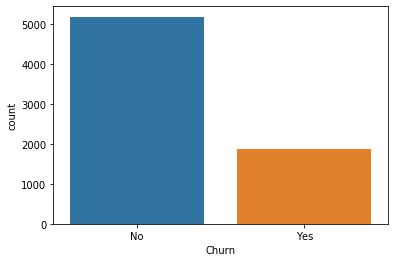

In [23]:
#visualisation (Check the target variable is balanced or not )
sns.countplot(data=df,x="Churn")
plt.show()

In [24]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [26]:
#separate all object type data and hold in df_cat
df_cat = df.select_dtypes("object")
#separate all numeric datatype type data and hold in df_num
df_num=df.select_dtypes(["float64","int64"])

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
gender              7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
Churn               7043 non-null object
dtypes: object(16)
memory usage: 880.5+ KB


In [28]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
SeniorCitizen     7043 non-null int64
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
TotalCharges      7043 non-null float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [31]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [32]:
#to concatenate df_num,df_cat and hold in new data frame df_new
df_new = pd.concat([df_num,df_cat],axis=1)

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
gender              7043 non-null int32
Partner             7043 non-null int32
Dependents          7043 non-null int32
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
Churn               7043 non-null int32
dtypes: float64(2), int32(16), int64(2)
memory usage: 660.4 KB


In [34]:
X=df_new.drop("Churn",axis=1) #select input features from dataset which hold in X
Y=df_new["Churn"]#Select target variable which want to predicted which hold in Y

In [35]:
 X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,
                                                     random_state=1)

In [36]:
#BASE LINE : LOGISTIC REGRESSION :-

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
#user defined function create_model()
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    return model

In [39]:
from sklearn.metrics import classification_report

In [40]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [41]:
#call function
create_model(lr)  

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



LogisticRegression()

In [42]:
#data Imbalance : solve by sampling technique 
#We handle Imbalance data ,We take some Samling Technique.
''' There are 2 types of Sampling Technique : -
1. Over Sampling TEchnique  2. Under Sampling TEchnique

#dataset : yes/no : Churn : target whose predicted
'''

' There are 2 types of Sampling Technique : -\n1. Over Sampling TEchnique  2. Under Sampling TEchnique\n\n#dataset : yes/no : Churn : target whose predicted\n'

In [43]:
pd.Series(Y_train).value_counts() #imbalance data 

0    3589
1    1341
Name: Churn, dtype: int64

In [44]:
#install package imblearn
#!pip install imblearn

In [45]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [47]:
#Oversampler
#create object of  RandomOverSampler() class
#creates duplicate row of yes means minority class and change into 
#majority class
ros = RandomOverSampler() #ros user defined object of RandomOverSampler class

In [48]:
X_sample1,y_sample1 = ros.fit_sample(X_train,Y_train) 

In [49]:
#check before balance
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [50]:
#check after balance
pd.Series(y_sample1).value_counts()

1    3589
0    3589
Name: Churn, dtype: int64

In [51]:
#Train the model after balance dataset with the help of Logistic Regression
#create the object of LogisticRegression class
lr1=LogisticRegression()

In [52]:
#train the data
lr1.fit(X_sample1,y_sample1)

LogisticRegression()

In [53]:
#check before balance (Testing data)
pd.Series(Y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [54]:
#balance testing data with the help of object of RandomOverSampler
X_sample_test,y_sample_test = ros.fit_sample(X_test,Y_test) 

In [55]:
#check after balance (Testing data)
pd.Series(y_sample_test).value_counts()

1    1585
0    1585
Name: Churn, dtype: int64

In [56]:
#testing
y_pred = lr1.predict(X_sample_test) #test the model

In [57]:
print(classification_report(y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1585
           1       0.75      0.79      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170



In [59]:
#Undersampler
#create object of  RandomUnderSampler() class
#Delete  row of no means majority  class and change into 
#minority class
rus = RandomUnderSampler() #rus user defined object of RandomUnderSampler class

In [60]:
X_sample2,y_sample2 = rus.fit_sample(X_train,Y_train) 

In [61]:
#check before balance
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [62]:
#check after balance
pd.Series(y_sample2).value_counts()

1    1341
0    1341
Name: Churn, dtype: int64

In [63]:
X_sample_test,y_sample_test = rus.fit_sample(X_test,Y_test) 

In [64]:
#check before balance
pd.Series(Y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [65]:
#check after balance
pd.Series(y_sample_test).value_counts()

1    528
0    528
Name: Churn, dtype: int64

In [66]:
#create object of Logistic Regression
lr2=LogisticRegression()

In [67]:
#train the model with balanced data
lr2.fit(X_sample2,y_sample2 )

LogisticRegression()

In [68]:
#testing the model with balanced data
y_pred=lr2.predict(X_sample_test)

In [69]:
print(classification_report(y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       528
           1       0.75      0.80      0.77       528

    accuracy                           0.76      1056
   macro avg       0.77      0.76      0.76      1056
weighted avg       0.77      0.76      0.76      1056



In [ ]:
#here use RandomUnderSampler then we got recall =0.80 good
#here use RandomOver Sampler then we got recall =0.79 good

In [ ]:
#Take DecisionTree : to select imp features : DT is a features selection 
#technique 
#DecisionTree with pruning technique (max_depth)

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
# create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier()

In [72]:
dt1.fit(X_sample2,y_sample2) #train

DecisionTreeClassifier()

In [73]:
#testing the model with balanced data
y_pred=dt1.predict(X_sample_test)

In [74]:
print(classification_report(y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       528
           1       0.71      0.72      0.72       528

    accuracy                           0.71      1056
   macro avg       0.71      0.71      0.71      1056
weighted avg       0.71      0.71      0.71      1056



In [83]:
#apply pruning tech of DT : to reduces overfitting situation
#1. max_depth parameter use :
#Again create a object of DecisionTreeClassifier and pass the parameter
dt2=DecisionTreeClassifier(max_depth=4) # not more than 8

In [84]:
dt2.fit(X_sample2,y_sample2)

DecisionTreeClassifier(max_depth=4)

In [85]:
#testing the model with balanced data
y_pred=dt1.predict(X_sample_test)

In [87]:
dt2.feature_importances_

array([0.        , 0.02138025, 0.06717359, 0.1168514 , 0.        ,
       0.        , 0.01102597, 0.        , 0.        , 0.04411147,
       0.02802093, 0.        , 0.        , 0.11074349, 0.        ,
       0.        , 0.6006929 , 0.        , 0.        ])

In [88]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [86]:
print(classification_report(y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       528
           1       0.71      0.72      0.72       528

    accuracy                           0.71      1056
   macro avg       0.71      0.71      0.71      1056
weighted avg       0.71      0.71      0.71      1056



In [89]:
#Apply ensembling tech.
#ADA Boost 
from sklearn.ensemble import AdaBoostClassifier

In [90]:
#create object of AdaBoostClassifier class
ada=AdaBoostClassifier()

In [91]:
ada.fit(X_sample2,y_sample2)

AdaBoostClassifier()

In [92]:
#testing the model with balanced data
y_pred=ada.predict(X_sample_test)

In [93]:
print(classification_report(y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       528
           1       0.75      0.83      0.79       528

    accuracy                           0.78      1056
   macro avg       0.78      0.78      0.78      1056
weighted avg       0.78      0.78      0.78      1056



In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gbc=GradientBoostingClassifier(n_estimators=5)

In [120]:
gbc.fit(X_sample2,y_sample2)

GradientBoostingClassifier(n_estimators=5)

In [121]:
#testing the model with balanced data
y_pred=gbc.predict(X_sample_test)

In [122]:
print(classification_report(y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       528
           1       0.72      0.84      0.77       528

    accuracy                           0.75      1056
   macro avg       0.76      0.75      0.75      1056
weighted avg       0.76      0.75      0.75      1056

